# M2 model 

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb

from cf_matrix import make_confusion_matrix
from funcs import data_handling, train_test_split_M2, get_X_line

In [84]:
plt.style.use("ggplot")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
mat_splits, por_splits = train_test_split_M2(random_state=42)
X_m_train, X_m_test, Y_m_train, Y_m_test, mat_sort_ind = mat_splits
X_p_train, X_p_test, Y_p_train, Y_p_test, por_sort_ind = por_splits

In [86]:
mat_splits, por_splits = train_test_split_M2(True, random_state=42)
X_m_train_b, X_m_test_b, Y_m_train_b, Y_m_test_b, mat_sort_ind_b = mat_splits
X_p_train_b, X_p_test_b, Y_p_train_b, Y_p_test_b, por_sort_ind_b = por_splits

# Regression model: grades - 0-20

In [100]:
mat = True

In [101]:
model = xgb.XGBRegressor(objective='reg:squarederror', validate_parameters=False)
params = { 
    'eta': np.logspace(-2, 0, 10),
    'objective': ['reg:squarederror', 'reg:squaredlogerror'],
    'booster': ["gbtree"],
    'max_depth': np.arange(1,7)
}

In [102]:
GsCV_reg = GridSearchCV(model, params, verbose=1, scoring="neg_mean_squared_error", cv=5)
if mat:
    GsCV_reg.fit(X_m_train, Y_m_train)
else:
    GsCV_reg.fit(X_p_train, Y_p_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   36.6s finished


In [103]:
reg_model = GsCV_reg.best_estimator_
print(GsCV_reg.best_score_)
print(GsCV_reg.best_params_)

-3.945803018882208
{'booster': 'gbtree', 'eta': 0.046415888336127774, 'max_depth': 3, 'objective': 'reg:squarederror'}


In [104]:
if mat:
    y_pred_reg = reg_model.predict(X_m_test)[mat_sort_ind]
    M2_reg_MSE = mean_squared_error(Y_m_test, y_pred_reg)
else:
    y_pred_reg = reg_model.predict(X_p_test)[por_sort_ind]
    M2_reg_MSE = mean_squared_error(Y_p_test, y_pred_reg)

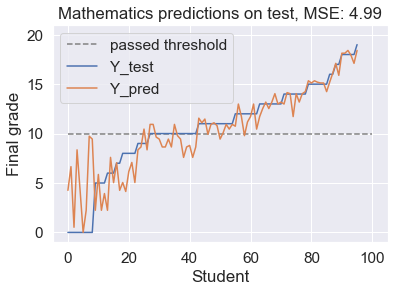

In [105]:
plt.plot((0,100), (10,10), color="gray", linestyle="--", label="passed threshold")
if mat:
    plt.plot(Y_m_test.round(), label = "Y_test")
    plt.title(f"Mathematics predictions on test, MSE: {M2_reg_MSE:.2f}")
else:
    plt.plot(Y_p_test.round(), label = "Y_test")
    plt.title(f"Portugese predictions on test, MSE: {M2_reg_MSE:.2f}")

plt.plot(y_pred_reg, label="Y_pred")
plt.ylim((-1,21))
plt.xlabel("Student")
plt.ylabel("Final grade")
plt.legend();

if mat: 
    filename="Results/M2_math_results_grads.png"
else:
    filename="Results/M2_Port_results_grades.png"
plt.savefig(filename, dpi=300)

NameError: name 'vals' is not defined

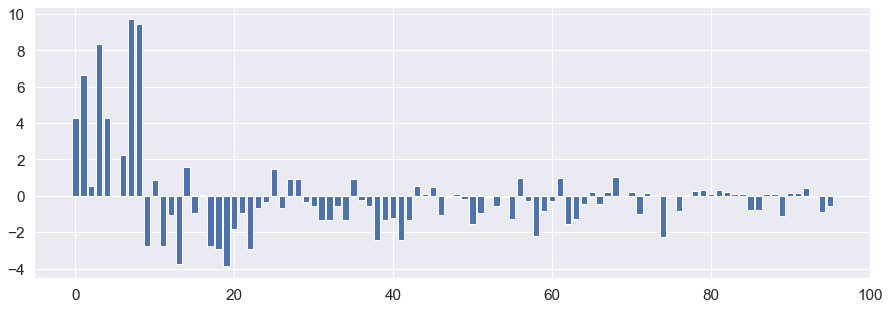

In [114]:
plt.figure(figsize=(15,5))
if mat:
    vals = 
    plt.bar(np.arange(Y_m_test.shape[0]),y_pred_reg- Y_m_test )
    pass_line = np.where(Y_m_test==10)[0][0]
    avg_error = (y_pred_reg- Y_m_test)[pass_line:].mean()
    plt.plot((pass_line, pass_line), (vals.min(), vals.max()), color="red", linestyle="--")
    subject = "Maths"
else:
    vals = y_pred_reg- Y_p_test
    plt.bar(np.arange(Y_p_test.shape[0]),vals )
    pass_line = np.where(Y_p_test==10)[0][0]
    avg_error = (y_pred_reg- Y_p_test)[pass_line:].mean()
    plt.plot((pass_line, pass_line), (vals.min(), vals.max()), color="red", linestyle="--")
    subject = "Portuguese"
plt.suptitle(f"Deviance from true grade - {subject}")
plt.title(f"Average error for passing students: {avg_error:.3f}")
plt.savefig("Results/M1_pred_deviance_"+subject+".png", dpi=300)

# Classification model: Passed/Failed
Set `mat_clf`to `True` to train the model on the maths grades and to `False` to train on portugese grades

In [106]:
mat_clf = True

In [107]:
params = { 
    'eta': np.logspace(-2, 0, 10),
    'objective': ['reg:squarederror', 'reg:squaredlogerror', 'reg:logistic', "binary:hinge"],
    'booster': ["gbtree"],
    'max_depth': np.arange(1,7)
}

In [108]:
GsCV_clf = GridSearchCV(model, params, verbose=1, scoring="neg_mean_squared_error", cv=5)
if mat_clf:
    GsCV_reg.fit(X_m_train_b, Y_m_train_b)
else:
    GsCV_reg.fit(X_p_train_b, Y_p_train_b)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   43.6s finished


In [109]:
clf_model = GsCV_reg.best_estimator_
print(GsCV_reg.best_score_)
print(GsCV_reg.best_params_)

-0.06589988963202914
{'booster': 'gbtree', 'eta': 0.1291549665014884, 'max_depth': 1, 'objective': 'reg:squarederror'}


In [110]:
if mat_clf:
    y_pred_clf = clf_model.predict(X_m_test_b)[mat_sort_ind_b]
    M2_clf_MSE = mean_squared_error(Y_m_test_b, y_pred_clf)
else:
    y_pred_clf = clf_model.predict(X_p_test_b)[por_sort_ind_b]
    M2_clf_MSE = mean_squared_error(Y_p_test_b, y_pred_clf)

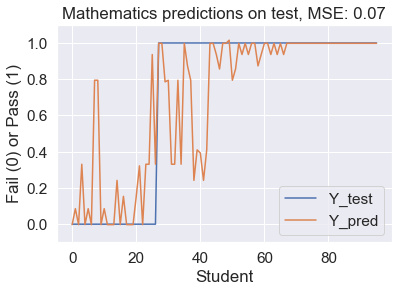

In [111]:
#plt.plot(y_pred_clf.round(), label="Y_pred_rounded",color="darkred")
if mat_clf:
    plt.plot(Y_m_test_b, label = "Y_test")
    plt.title(f"Mathematics predictions on test, MSE: {M2_clf_MSE:.2f}")
    filename="Results/M2_math_binary_plotted_results.png"
else:
    plt.plot(Y_p_test_b, label = "Y_test")
    plt.title(f"Portugese predictions on test, MSE: {M2_clf_MSE:.2f}")
    filename="Results/M2_Port_binary_plotted_results.png"
plt.plot(y_pred_clf, label="Y_pred")
plt.ylim((-0.1,1.1))
plt.xlabel("Student")
plt.ylabel("Fail (0) or Pass (1)")
plt.legend();
plt.savefig(filename, dpi=300)

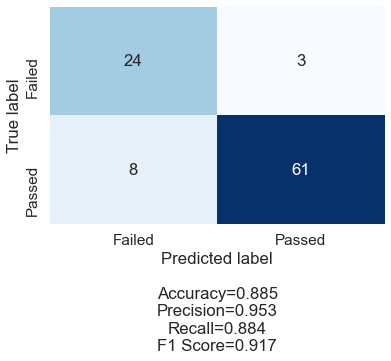

In [112]:
if mat_clf:
    cf = confusion_matrix(Y_m_test_b, y_pred_clf.round())
    filename="Results/M2_math_binary_cf_results.png"
else:
    cf = confusion_matrix(Y_p_test_b, y_pred_clf.round())
    filename="Results/M2_Port_binary_cf_results.png"
make_confusion_matrix(cf, categories=['Failed', 'Passed'], cbar=False, percent=False)
plt.savefig(filename, dpi=300)